# **0. Libraries**

In [ ]:
!pip install pandas-profiling==2.7.1

In [31]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# **1. Dataset**

In [3]:
df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\projects_git\kaggle_credit_card\data\.csv\CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **2. Exploratory Analisys**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset: 27it [00:00, 137.42it/s, Completed]
Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


In [8]:
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


<AxesSubplot:>

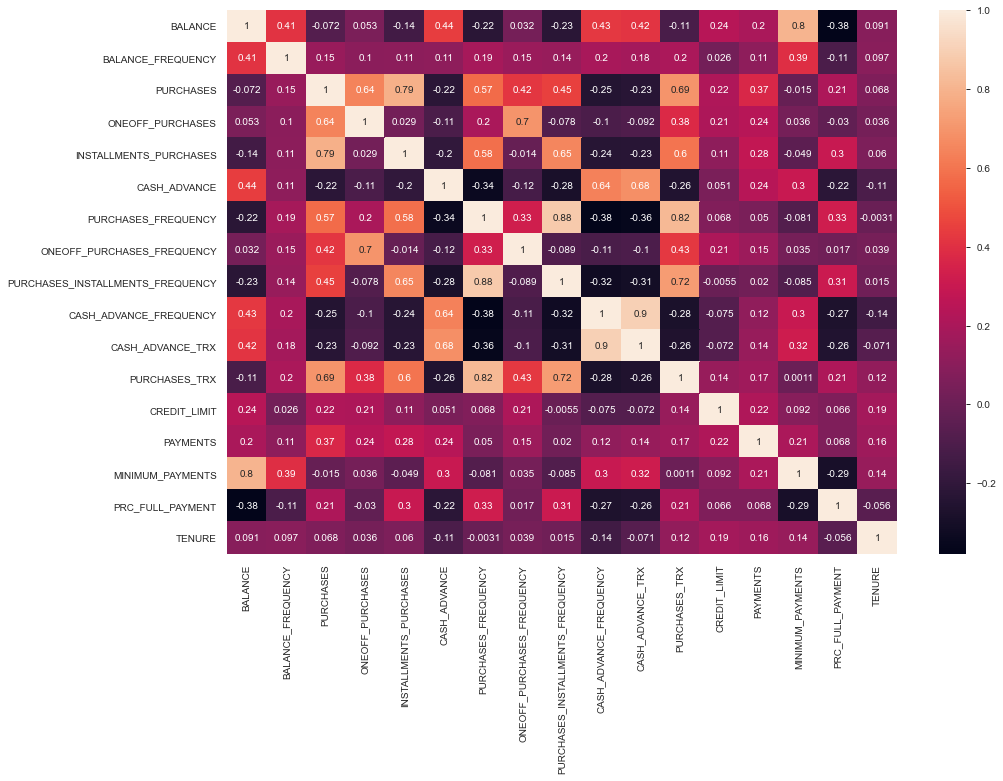

In [25]:

fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## 2.1 Main Analisys

## 2.2 Data Cleaning

### 2.2.1 Blanks

In [12]:
#Preencher os valores ausentes com o mínimo da coluna
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].min(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].min(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 2.2.2 Outliers

In [21]:
np.quantile(df['BALANCE'],0.95)

5909.111807849996

In [22]:
outliers_columns = ['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']

for i in outliers_columns:
    limit = df[i].quantile(0.95)
    df = df[df[i]<limit]

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,5550.0,832.486080,1027.513373,0.000000,53.400141,412.841852,1268.013678,5901.592192
BALANCE_FREQUENCY,5550.0,0.841700,0.265193,0.000000,0.756945,1.000000,1.000000,1.000000
PURCHASES,5550.0,432.484301,516.419191,0.000000,32.622500,259.300000,633.830000,3654.080000
ONEOFF_PURCHASES,5550.0,188.472960,319.834004,0.000000,0.000000,0.000000,250.000000,1370.000000
INSTALLMENTS_PURCHASES,5550.0,244.347683,396.293021,0.000000,0.000000,70.685000,343.947500,3362.670000
CASH_ADVANCE,5550.0,363.703221,658.720724,0.000000,0.000000,0.000000,436.852575,3058.096526
PURCHASES_FREQUENCY,5550.0,0.449513,0.385939,0.000000,0.083333,0.416667,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,5550.0,0.127538,0.225164,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,5550.0,0.339292,0.381710,0.000000,0.000000,0.166667,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,5550.0,0.081100,0.125014,0.000000,0.000000,0.000000,0.142857,0.900000


# **3. Feature Engineering**

## 3.1 Feature Selection

In [13]:
df.drop('CUST_ID', axis=1, inplace=True)

# **4. Modeling**

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## 4.1 Clustering

In [49]:
pca = PCA(n_components=2)
comp = pca.fit_transform(df_scaled)

PCA_df = pd.DataFrame(data = comp, columns = ['var1', 'var2'])

## 4.1.1 KMeans

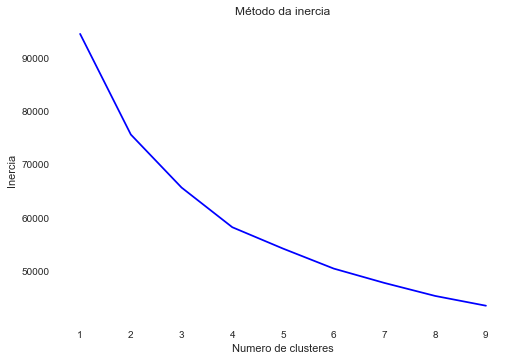

In [36]:
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k).fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Método da inercia')
plt.show()

In [51]:
km = KMeans(4)
km_labels = km.fit_predict(df_scaled) 
df_clusters = df.copy()
df_clusters['km_labels'] = km_labels.astype('str')

<AxesSubplot:xlabel='var1', ylabel='var2'>

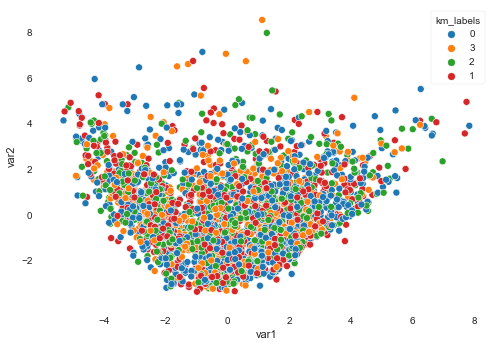

In [52]:
PCA_df['km_labels'] = df_clusters['km_labels']
sns.scatterplot(data=PCA_df, x='var1',y='var2',hue='km_labels')

## 4.1.2 Hierarchical Clustering

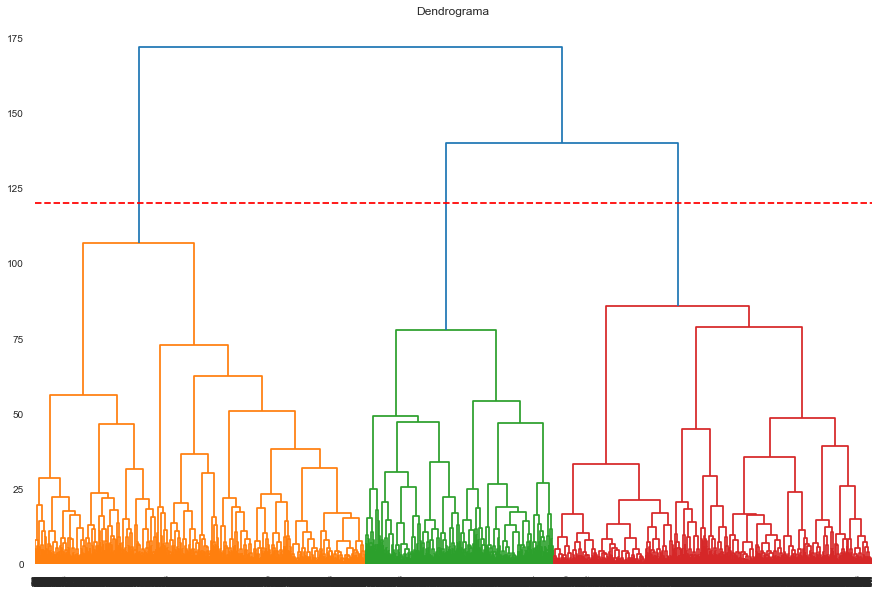

In [54]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=120, color='r', linestyle='--')

In [55]:
hc_cluster = AgglomerativeClustering(n_clusters=3)  
hc_labels = hc_cluster.fit_predict(df_scaled)
df_clusters['hc_labels'] = hc_labels.astype('str')

<AxesSubplot:xlabel='var1', ylabel='var2'>

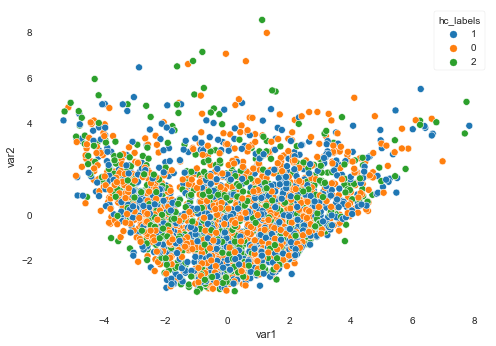

In [56]:
PCA_df['hc_labels'] = df_clusters['hc_labels']
sns.scatterplot(data=PCA_df, x='var1',y='var2',hue='hc_labels')

## 4.1.3 DBSCAN

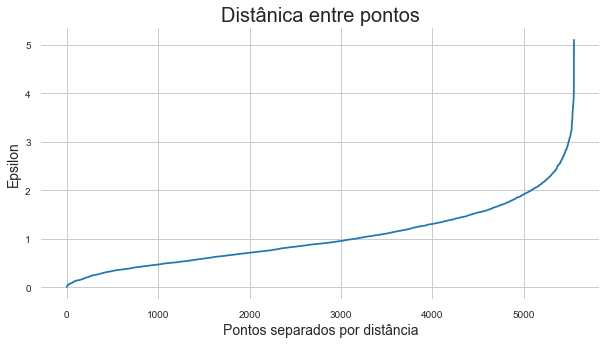

In [87]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Distânica entre pontos',fontsize=20)
plt.xlabel('Pontos separados por distância',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid(True)
plt.show()

In [90]:
db = DBSCAN(eps=2, min_samples=5).fit(df_scaled)
db_labels = db.labels_
df_clusters['db_labels'] = db_labels.astype('str')

<AxesSubplot:xlabel='var1', ylabel='var2'>

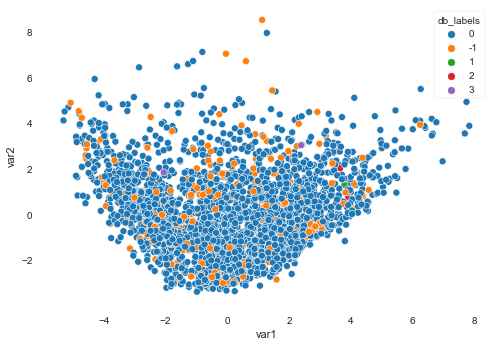

In [91]:
PCA_df['db_labels'] = df_clusters['db_labels']
sns.scatterplot(data=PCA_df, x='var1',y='var2',hue='db_labels')

## 4.1.4 MeanShift

In [106]:
bandwidth = estimate_bandwidth(df_scaled, quantile=0.15)

In [107]:
ms = MeanShift(bandwidth=bandwidth).fit(df_scaled)
ms_labels = ms.labels_
df_clusters['ms_labels'] = ms_labels.astype('str')

<AxesSubplot:xlabel='var1', ylabel='var2'>

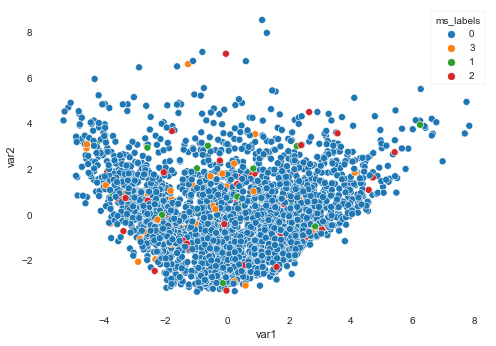

In [108]:
PCA_df['ms_labels'] = df_clusters['ms_labels']
sns.scatterplot(data=PCA_df, x='var1',y='var2',hue='ms_labels')

## 4.1.5 Gaussian Mixture

Text(0.5, 0, 'n_components')

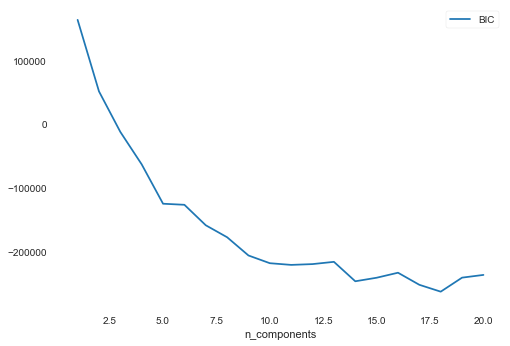

In [109]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_scaled) for n in n_components]

plt.plot(n_components, [m.bic(df_scaled) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [113]:
gm = GaussianMixture(4).fit(df_scaled)
gm_labels = gm.predict(df_scaled)
df_clusters['gm_labels'] = gm_labels.astype('str')

<AxesSubplot:xlabel='var1', ylabel='var2'>

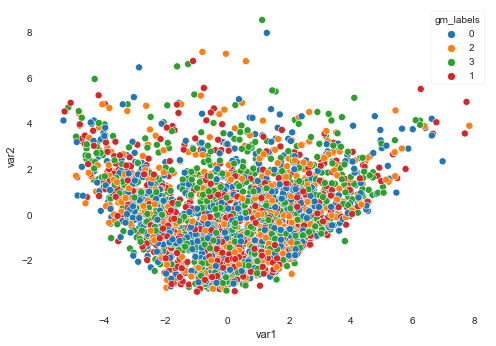

In [114]:
PCA_df['gm_labels'] = df_clusters['gm_labels']
sns.scatterplot(data=PCA_df, x='var1',y='var2',hue='gm_labels')

## 4.2 Regression

## 4.2.1 Select Technique